# Import Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import Data & Rename Columns

In [10]:
df = pd.read_csv('Mall_Customers_Start.csv')
df.head()

,CustomerID,Gender,Age,Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Check Descriptive Statistics

In [11]:
df.describe()

,CustomerID,Age,Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


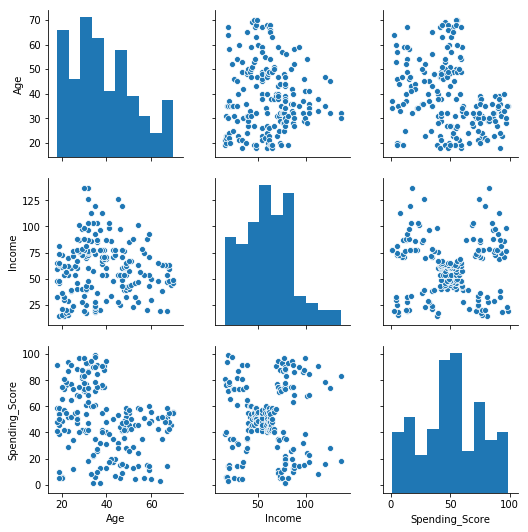

In [12]:
#Plot Age, Income and Spending Score Correlation
sns.pairplot(df[['Age','Income', 'Spending_Score']])

# Perform K-Mean Clustering with 5 Clusters

In [13]:
import sklearn.cluster as cluster

In [14]:
# We will use 2 Variables for this example
kmeans = cluster.KMeans(n_clusters=5 ,init="k-means++")
kmeans = kmeans.fit(df[['Spending_Score','Income']])

In [15]:
kmeans.cluster_centers_

array([[20.91304348, 26.30434783],
       [17.11428571, 88.2       ],
       [79.36363636, 25.72727273],
       [49.51851852, 55.2962963 ],
       [82.12820513, 86.53846154]])

# Attach Clusters to the Original Data 

In [16]:
df['Clusters'] = kmeans.labels_

In [17]:
df.head()

,CustomerID,Gender,Age,Income,Spending_Score,Clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0


In [18]:
df['Clusters'].value_counts()

3    81
4    39
1    35
0    23
2    22
Name: Clusters, dtype: int64

# Export Data with Clusters

In [19]:
df.to_csv('Mall_Customers_End.csv', index = False)

# Plot Cluster on Chart 

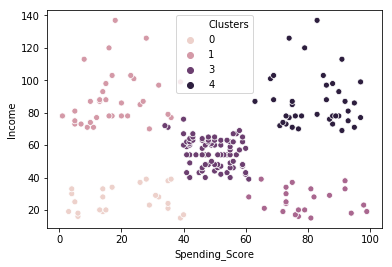

In [20]:
sns.scatterplot(x="Spending_Score", y="Income",hue = 'Clusters',  data=df)

### Next, we will create Elbow Plot and Silhoutte Score

# END